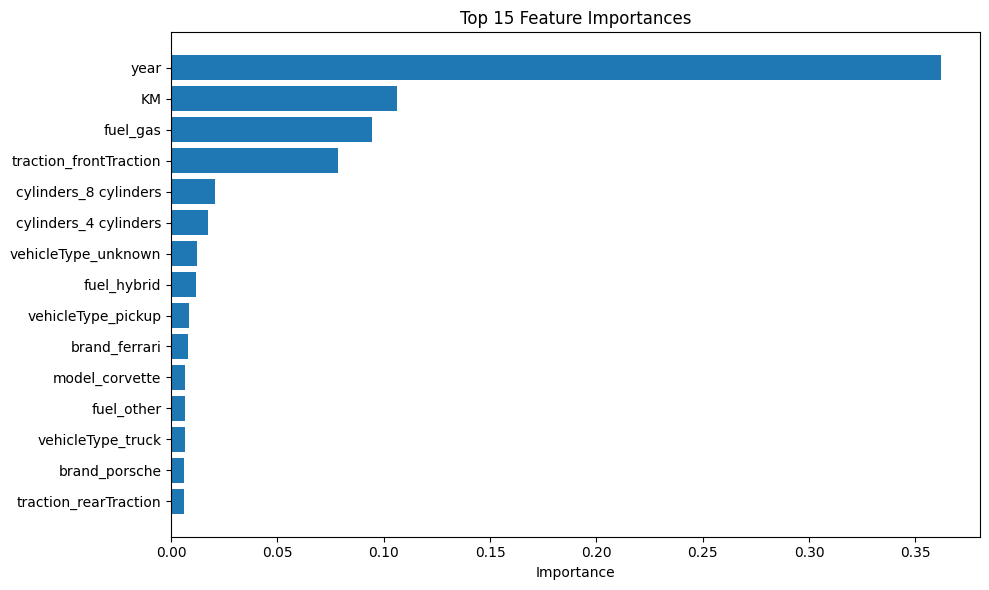

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("../data/vehicles.csv")

# Codificar las variables categoricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar X e y
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

# Separacion de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtener importancias
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Mostrar el grafico
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'][:15][::-1], importance_df['Importance'][:15][::-1])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
